<a href="https://colab.research.google.com/github/maciekpojedynski/housing-boston-prediction/blob/main/housing_boston_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('/content/boston.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#Przygotowanie nowych nazw kolumn
column_mapping = {
    'CRIM': 'crime_rate',
    'ZN': 'residential_zone_proportion',
    'INDUS': 'non-retailand_business_acres',
    'CHAS': 'river_dummy',
    'NOX': 'nitric_oxide_concentration',
    'RM': 'average_number_of_rooms_per_dwelling',
    'DIS': 'weighted_distances_to_employment_centers',
    'RAD': 'index_of_accessibility_to_radial_highways',
    'PTRATIO': 'pupil_teacher_ratio',
    'B': 'black_ppl_per',
    'LSTAT': 'lower_population',
    'MEDV': 'median_house_value'
}

In [5]:
#Funkcja zmiany nazw kolumn
def renaming_column(df, mapping):
  return df.rename(columns = mapping)

In [6]:
housing = renaming_column(housing, column_mapping)

In [7]:
print(housing.head())

   crime_rate  residential_zone_proportion  non-retailand_business_acres  \
0     0.00632                         18.0                          2.31   
1     0.02731                          0.0                          7.07   
2     0.02729                          0.0                          7.07   
3     0.03237                          0.0                          2.18   
4     0.06905                          0.0                          2.18   

   river_dummy  nitric_oxide_concentration  \
0            0                       0.538   
1            0                       0.469   
2            0                       0.469   
3            0                       0.458   
4            0                       0.458   

   average_number_of_rooms_per_dwelling   AGE  \
0                                 6.575  65.2   
1                                 6.421  78.9   
2                                 7.185  61.1   
3                                 6.998  45.8   
4                    

In [8]:
print(housing.describe())

       crime_rate  residential_zone_proportion  non-retailand_business_acres  \
count  506.000000                   506.000000                    506.000000   
mean     3.613524                    11.363636                     11.136779   
std      8.601545                    23.322453                      6.860353   
min      0.006320                     0.000000                      0.460000   
25%      0.082045                     0.000000                      5.190000   
50%      0.256510                     0.000000                      9.690000   
75%      3.677083                    12.500000                     18.100000   
max     88.976200                   100.000000                     27.740000   

       river_dummy  nitric_oxide_concentration  \
count   506.000000                  506.000000   
mean      0.069170                    0.554695   
std       0.253994                    0.115878   
min       0.000000                    0.385000   
25%       0.000000           

In [9]:
print(housing.isnull().sum())

crime_rate                                   0
residential_zone_proportion                  0
non-retailand_business_acres                 0
river_dummy                                  0
nitric_oxide_concentration                   0
average_number_of_rooms_per_dwelling         0
AGE                                          0
weighted_distances_to_employment_centers     0
index_of_accessibility_to_radial_highways    0
TAX                                          0
pupil_teacher_ratio                          0
black_ppl_per                                0
lower_population                             0
median_house_value                           0
dtype: int64


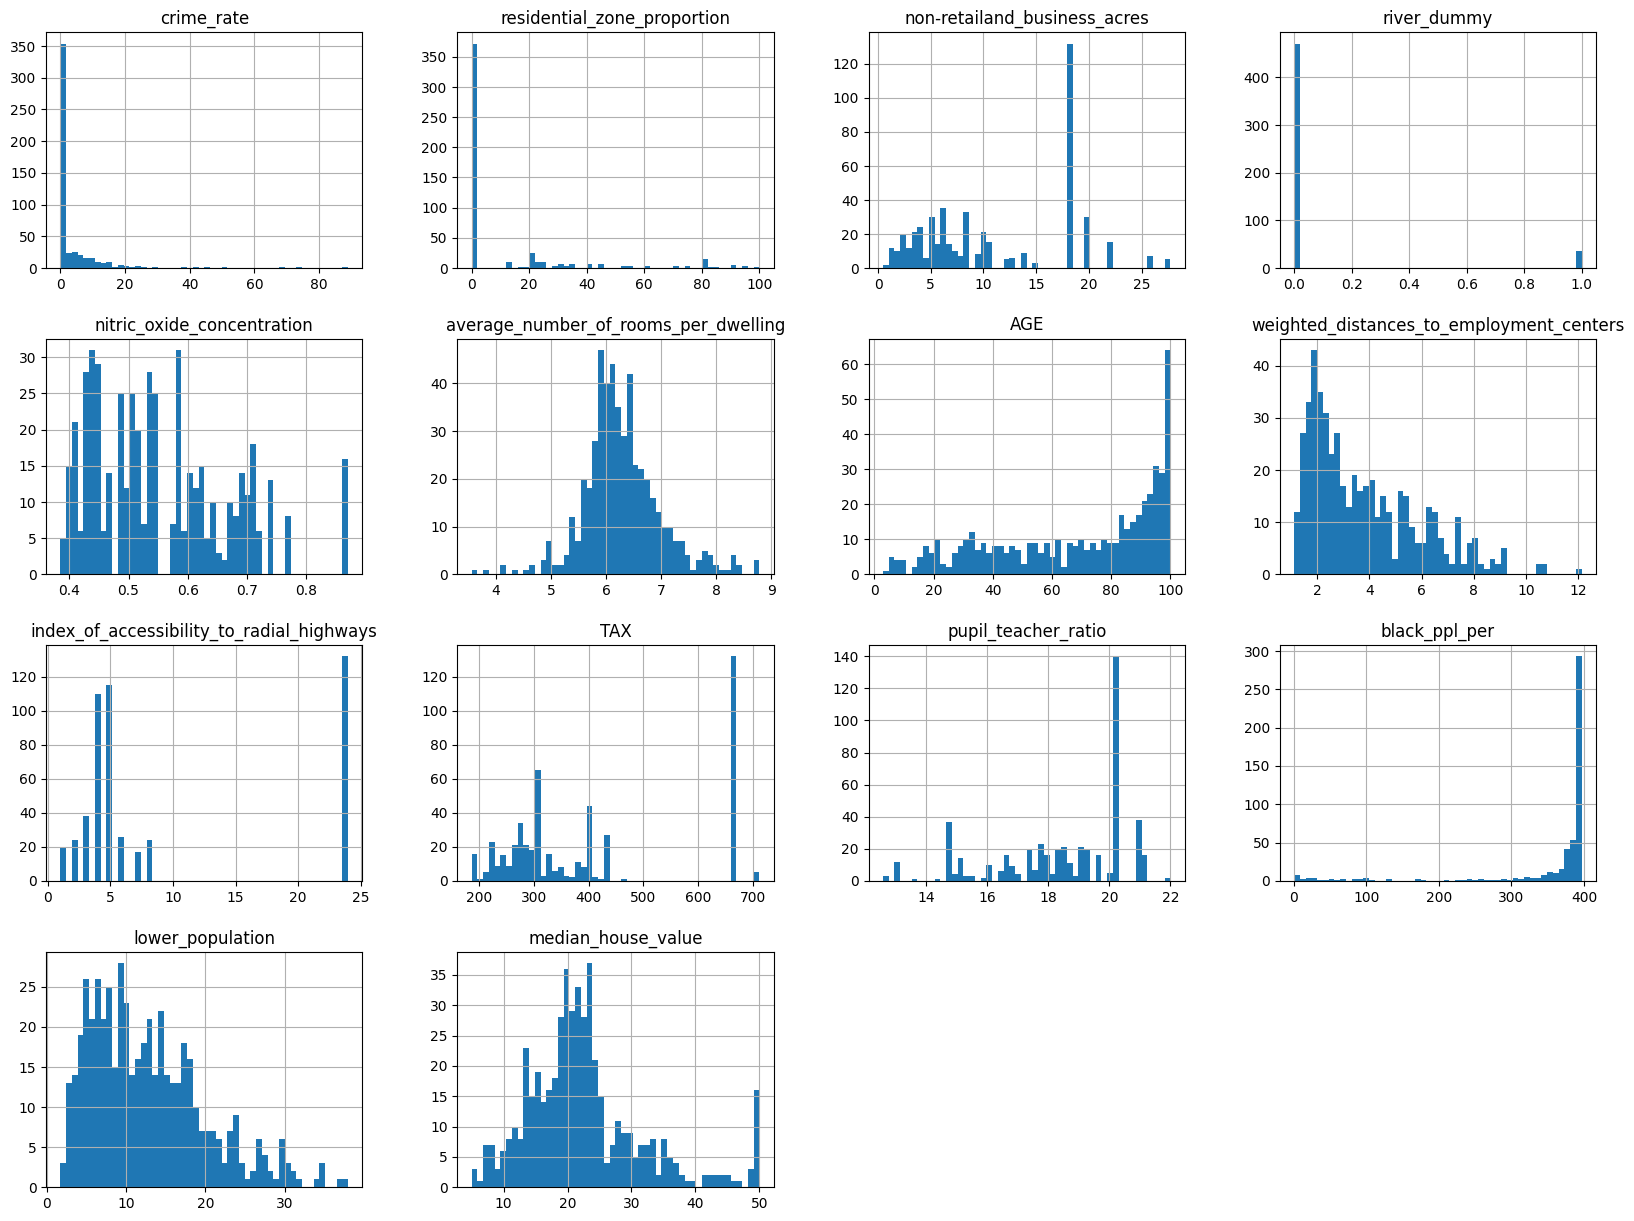

In [10]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [11]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix['median_house_value'].sort_values(ascending = False)


,median_house_value
median_house_value,1.000000
average_number_of_rooms_per_dwelling,0.695360
residential_zone_proportion,0.360445
black_ppl_per,0.333461
weighted_distances_to_employment_centers,0.249929
river_dummy,0.175260
AGE,-0.376955
index_of_accessibility_to_radial_highways,-0.381626
crime_rate,-0.388305
nitric_oxide_concentration,-0.427321


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='average_number_of_rooms_per_dwelling', ylabel='median_house_value'>,
        <Axes: xlabel='lower_population', ylabel='median_house_value'>,
        <Axes: xlabel='pupil_teacher_ratio', ylabel='median_house_value'>,
        <Axes: xlabel='non-retailand_business_acres', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='average_number_of_rooms_per_dwelling', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='lower_population', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='pupil_teacher_ratio', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='non-retailand_business_acres', ylabel='average_number_of_rooms_per_dwelling'>],
       [<Axes: xlabel='median_house_value', ylabel='lower_population'>,
        <Axes: xlabel='average_number_of_r

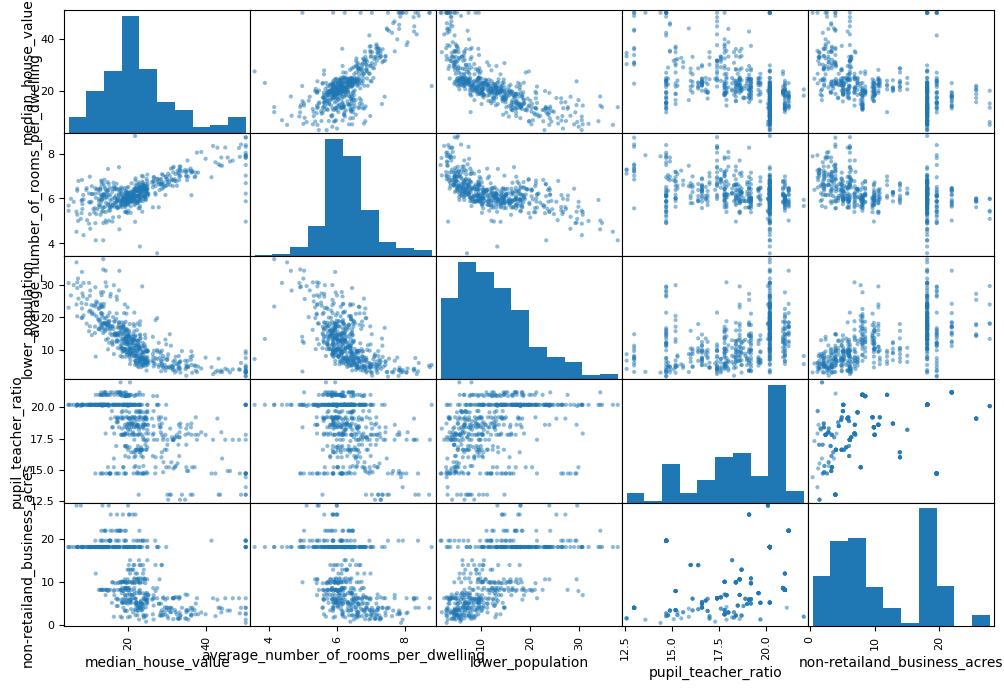

In [12]:
attributes = ['median_house_value','average_number_of_rooms_per_dwelling','lower_population','pupil_teacher_ratio', 'non-retailand_business_acres']

pd.plotting.scatter_matrix(housing[attributes], figsize = (12, 8))

In [15]:
#Tworzenie zmiennej do stratyfikacji

housing['median_cat'] = pd.cut(housing['median_house_value'],
                               bins = [0, 15, 20, 25, 30, np.inf],
                               labels = [1, 2, 3, 4,5]
)

X = housing.drop('median_house_value', axis = 1)
y = housing['median_house_value']

In [16]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(
  X,
  y,
  test_size = 0.2,
  random_state = 42,
  stratify = housing['median_cat']
)

In [17]:
#usuwanie pomocniczej kolumny
housing.drop('median_house_value', axis = 1, inplace=True)